# Financial Functions Package

The financial function packages provides generic financial operations and classes to perform financial mathematics, risk assesment, ...

### dependencies


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date


## FUNCTIONS 

### toDate

In [2]:
def toDate(datetime_obj):
    '''toDate function
    Transforms a datetime object to date. 
    '''
    return date(datetime_obj.year, datetime_obj.month, datetime_obj.day)

In [6]:
# declare a datetime object 
test_date = datetime.strptime('2016/10/01', '%Y/%m/%d')
type(test_date)

datetime.datetime

In [7]:
test_date = toDate(test_date)
type(test_date)

datetime.date

### futureValue

Calculate the future value of a present captial for some periods and interest rate. 

$$ S_{t+n} = S_t (1 + i)^n$$

**Note** the provided interest rate must be decimal and adjusted to the capitalization periods. 

In [9]:
futureValue = lambda capital, interest, periods: capital * (1 + interest) ** periods

In [16]:
initial_capital = 1000
interest        = 0.01
periods         = 4

future_value = futureValue(initial_capital, interest, periods)

string = 'The future value of {} monetary units at a given interest rate of {} and {} periods is: {} monetary units.'
print(string.format(initial_capital, interest, periods, future_value))

The future value of 1000 monetary units at a given interest rate of 0.01 and 4 periods is: 1040.60401 monetary units.


### contFutureValue 
Calculate the future value of a present capital with continuously compunding interest rate. 

$$ S_{t+y} = S_t e^{r y}$$

**Note** for compatibility with other functions time must be set to years.

In [94]:
contFutureValue = lambda capital, interest, years: capital * np.exp(interest * years)

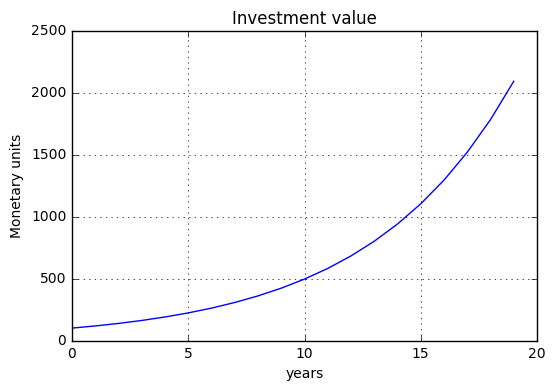

In [108]:
years = np.arange(20)

f = np.vectorize(lambda x: contFutureValue(100, 0.16, x))

plt.plot(years, f(years))
plt.xlabel('years')
plt.ylabel('Monetary units')
plt.title('Investment value')
plt.grid()
plt.show()

### contPresentValue
Calculate the present value of a future capital with continuously compunding interest rate. 

$$ S_t = S_{t+y} e^{-r y}$$

In [109]:
contPresentValue = lambda capital, interest, years: capital * np.exp(-interest * years)

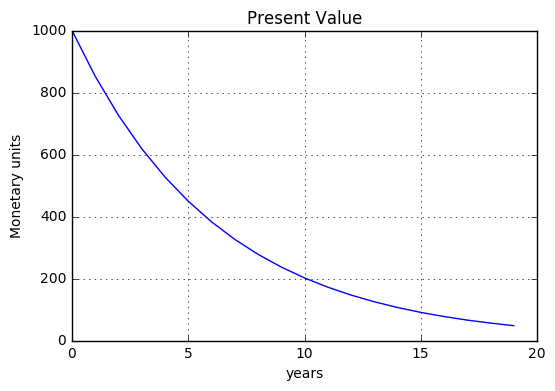

In [112]:
years = np.arange(20)

f = np.vectorize(lambda x: contPresentValue(1000, 0.16, x))

plt.plot(years, f(years))
plt.xlabel('years')
plt.ylabel('Monetary units')
plt.title('Present Value')
plt.grid()
plt.show()

### presetValue

Calulate the present value of a future capital for some periods and interest rate. 

$$ S_t = S_{t+n}(1+i)^{-n}$$

**Note** the provided interest rate must be decimal and adjusted to the capitalization periods. 

In [17]:
presetValue = lambda capital, interest, periods: capital * (1 + interest) ** (-periods)

In [18]:
initial_capital = 1000
interest        = 0.01
periods         = 4

future_value = futureValue(initial_capital, interest, periods)
present_value= presetValue(future_value,    interest, periods)

string = 'The present value of {} monetary units at a given interest rate of {} and {} periods is: {} monetary units.'
print(string.format(future_value, interest, periods, present_value))

The present value of 1040.60401 monetary units at a given interest rate of 0.01 and 4 periods is: 1000.0 monetary units.


### annualInterest

Calculate the annual interest rate...

$$ S_{t+y} = S_t (1+i)^y$$

$$ i = (S_{t+y} S_t^{-1})^{\frac{1}{y}} - 1 $$

In [22]:
annualInterest = lambda initial_capital, end_capital, years: (end_capital / initial_capital) ** (1 / years) - 1

In [31]:
initial_capital = 1000
final_capital   = 1200
years           = 2

annual_interest = annualInterest(initial_capital, final_capital, years)

string = 'The annual interest rate with one capitalization per year for {} year-investment \nwith initial capital of {} and final capital of {} is: {:.2f} %'
print(string.format(years, initial_capital, final_capital, 100*annual_interest))

The annual interest rate with one capitalization per year for 2 year-investment 
with initial capital of 1000 and final capital of 1200 is: 9.54 %


### equivalentAnnualInterest

Calculate the equivalent annual interest rate (interest rate with 1y capitalization) for a given interest rate i with cap-capitalizations per year. 

$$ (1 + \frac{r}{c})^{c} = (1 + i)^{1}$$ 

$$ i = (1 + \frac{r}{c})^{c} - 1 $$

In [32]:
equivalentAnnualInterest = lambda rate, cap: (1 + rate / cap) ** cap - 1 

In [113]:
rate_1m = 0.12
annual_eq = equivalentAnnualInterest(rate_1m, 12)
annual_eq

0.12682503013196977

### equivalentRate

Calcuulate the equivalent interest rate with custom new_cap-capitalizations per year for a given interest rate with cap-capitalizations per year. 


$$ (1 + \frac{r}{c})^{c} = (1 + \frac{i}{nc})^{nc}$$ 

$$ i = nc((1 + \frac{r}{c})^{\frac{c}{nc}} - 1)$$

In [34]:
equivalentRate = lambda rate, cap, new_cap: new_cap * ((1 + rate / cap) ** (cap / new_cap) - 1)

In [81]:
rate_1m = 0.12 
rate_3y = equivalentRate(rate_1m, 12, 1/3)

In [82]:
fv_1m = futureValue(100, rate_1m / 12, 12)
fv_3y = futureValue(100, 3*rate_3y, 1/3)

print('100 monetary units investment in 1 year. \n')
print('FutureValue using rate_1m: {}'.format(fv_1m))
print('FutureValue using rate_3y: {}'.format(fv_3y))

100 monetary units investment in 1 year. 

FutureValue using rate_1m: 112.68250301319698
FutureValue using rate_3y: 112.68250301319698


### contEquivalentRate

$$ (1 + i)^y = e^{y*r} $$

$$ r = ln(1+i)$$

In [80]:
def contEquivalentRate(rate, cap):
    '''contEquivalentRate function
    add description 
    
    ---- inputs 
    rate:
    cap: 
    
    ----- outputs
    Continuosly cap interest rate (time must be set to years)
    '''
    
    # equivalent annual interest rate 
    i = equivalentAnnualInterest(rate, cap)
    
    return np.log(1+i)

In [78]:
rate_1m = 0.12
eq_rate = contEquivalentRate(rate_1m, 12)

In [79]:
present_value = 100

print('Future_value rate_1m: {}\nFuture_value eq_rate: {}'.format(futureValue(present_value,rate_1m/12,12), 100*np.exp(eq_rate)))

Future_value rate_1m: 112.68250301319698
Future_value eq_rate: 112.68250301319698


### getRiskFreeRate

Get the mexican risk-free reference rate from the institutional webpage of the cental bank.

In [38]:
def getRiskFreeRate():
    '''getRiskFreeRate function.
    description: This fuction returns the risk-free interest rate (cetes) for 28,91,182 days.
    
    ---- inputs
     
    
    ---- outputs
    
    
    '''
    
    # import libraries
    import urllib.request
    
    # open url to get source
    with urllib.request.urlopen('http://www.banxico.org.mx/SieInternet/'+
                                'consultarDirectorioInternetAction.do?a'+
                                'ccion=consultarCuadro&idCuadro=CF107&s'+
                                'ector=22&locale=es') as response:
        
        # read source and save as string 
        html_source = response.read().decode('latin-1')
    
    
    # identify target
    def getTarget(source):
        '''getTarget function
        description: function adapted to retrieve the value of cetes interest rate. 
        
        ---- inputs
        source: 
        
        ---- outputs
        position_index: 
        value: 
        
        '''
        
        tasa_de_rendimiento = source.find('Tasa de rendimiento')
        visibility_hidden   = 0
        
        for i in range(3):
            visibility_hidden += source[tasa_de_rendimiento:][visibility_hidden:].find('<span style="visibility:hidden">')+34
            
        position_index = tasa_de_rendimiento + visibility_hidden - 10 - 34
        value          = float(source[position_index:position_index+10].strip(' '))
        return position_index, value

    
    # get key,values and save in dictionary 
    cetes_dictionary = {}
    reference_index  = 0
    
    for i in [28, 91, 182]:
        html_source            = html_source[reference_index:]
        reference_index, value = getTarget(html_source)
        cetes_dictionary[i]    = value
    
    
    return cetes_dictionary


In [43]:
cetes_dictionary = getRiskFreeRate()

print('CETES 28 : {}\nCETES 91 : {}\nCETES 182: {}'.format(cetes_dictionary[28], cetes_dictionary[91], cetes_dictionary[182]))

CETES 28 : 5.65
CETES 91 : 5.83
CETES 182: 6.09


## CLASSES 

### interest_rate

In [412]:
class interest_rate:
    
    # basic description and references
    desc          = 'Interest Rate Object'
    cap_options   = {'daily':360, '1m':12, '2m':6, '3m':4, '4m':3, '6m':2, '1y':1, 'cont':float('inf')}
    cetes         = getRiskFreeRate()
    
    
    # init class 
    def __init__(self, rate = {'rate':0.12, 'cap':12}):
        self.reference_rate = rate
    
    def annualRate(self, cap_desc):
        '''calulate_equivalent method
        Use the reference_rate to calculate different equivalent rates. 
        Specif: daily, monthly, 2-months, 3-months, 4-months, 6-months, 1y, continuously
        '''
        
        # get capitalization frequency
        if type(cap_desc) == type(' '):
            aux = self.cap_options[cap_desc]
        elif type(cap_desc) == type(1):
            aux = cap_desc
        
        if cap_desc == 'cont':
            return contEquivalentRate(self.reference_rate['rate'], self.reference_rate['cap'])
        
        return equivalentRate(self.reference_rate['rate'], self.reference_rate['cap'], aux)
        

    def rate(self, cap_desc):
        '''rate method
        Use equivalentRate to generate a ready-to-use rate.
        '''
        
        # get capitalization frequency
        if type(cap_desc) == type(' '):
            aux = self.cap_options[cap_desc]
        elif type(cap_desc) == type(1):
            aux = cap_desc
        
        if cap_desc == 'cont':
            return self.annualRate(cap_desc)
        
        return self.annualRate(cap_desc) / aux
    
    def riskFreeSpread(self, risk_free = 28, silence = False, kind = 'cont'):
        '''riskFreeSpread function
        Calculate the spread between the risk free interest rate and the pacted interest rate.
        kind = ['cont','eq_annual']
        '''
        
        # catch error 
        # TODO: check if risk_free is on cetes.keys()
        
        if kind == 'cont':
            r  = contEquivalentRate(self.reference_rate['rate'], self.reference_rate['cap'])
            rf = contEquivalentRate(self.cetes[risk_free] / 100, 360/risk_free)
            if not silence:
                print('Decimal spread for equivalent continuos interest ({:.2f}% - {:.2f}%): {}'.format(100*r, 100*rf,r - rf))
            return r - rf 
        
        r  = equivalentAnnualInterest(self.reference_rate['rate'], self.reference_rate['cap'])
        rf = equivalentAnnualInterest(self.cetes[risk_free] / 100, 360/risk_free)
        if not silence:
            print('Decimal spread for equivalent annual interest ({:.2f}% - {:.2f}%): {}'.format(100*r, 100*rf,r - rf))
        return r - rf 
    

In [413]:
# Declare a scpecific intereste rate instance
specific_interest = interest_rate({'rate':0.12, 'cap':12})



In [414]:
specific_interest.rate('cont')

0.11940397023801703

In [415]:
specific_interest.rate(360)

0.00033173270623421125

In [416]:
spread = specific_interest.riskFreeSpread()

Decimal spread for equivalent continuos interest (11.94% - 5.64%): 0.0630277507948731


### debt

In [409]:
class debt:

    desc = 'Interest Rate Object'
    rate_options  = {360:'daily', 12:'1m', 6:'2m', 4:'3m', 3:'4m', 2:'6m', 1:'1y'}
    cap_options   = {'daily':360, '1m':12, '2m':6, '3m':4, '4m':3, '6m':2, '1y':1}
    cetes         = getRiskFreeRate()

    def __init__(self, initial_date, final_date,capital = 10000, rate = {'rate':0.12, 'cap':12}, discount_rate = 28):
            
        self.payments = []
        self.invalid_payments = []
        
        # dates 
        self.initial_date   = toDate(datetime.strptime(initial_date, '%b %d %Y'))
        self.final_date     = toDate(datetime.strptime(final_date, '%b %d %Y'))
        self.actual_date    = toDate(datetime.now())
            
        self.initial_date_string = initial_date
        self.final_date_string   = final_date

        # capital 
        self.capital = capital

        # rate 
        self.reference_rate = rate
        self.i = interest_rate(self.reference_rate)

        self.final_capital  = round(futureValue(capital, self.i.rate(360), (self.final_date - self.initial_date).days), 2)

        # discount rate
        # TODO: validate 

        self.discount_rate = interest_rate({'rate':self.cetes[discount_rate]/100, 'cap':360/discount_rate})
    
    def daysToGo(self, ref_date = None):
        '''daysToGo functions 
        Returns the days between actual_date and final_date 
        '''
        if type(ref_date) == type(None):
            ref_date = self.actual_date
        
        if type(ref_date) == type(''):
            ref_date = toDate(datetime.strptime(ref_date, '%b %d %Y'))
        
        return (self.final_date - ref_date).days

    
    def diffDates(self, date0, date1):
        '''diffDates
        Returns the diff betwenn two dates
        '''
        date0 = toDate(datetime.strptime(date0, '%b %d %Y'))
        date1 = toDate(datetime.strptime(date1, '%b %d %Y'))
        return (date1-date0).days

    def discountRate(self, cap_desc):
        '''discountRate function
        Use discountRate function to get the discount interest rate for...
        '''
        
        return self.discount_rate.rate(cap_desc)
    
    def registerPayment(self, amount, date = 'now'):
        '''registerPayment function
        add description
        '''
        
        if 'now' in date:
            date = datetime.strftime(datetime.now(), '%b %d %Y')
        
        if len(self.payments) == 0:
            self.payments.append({'id':1,'date':date,'amount':amount,'valid':True})
        else:
            new_id = self.payments[-1]['id'] + 1
            self.payments.append({'id':new_id,'date':date,'amount':amount,'valid':True})
    
    def invalidPayments(self, _id):
        '''invalidPayments function
        '''
        self.invalid_payments.append(_id)
        
        if len(self.payments) != 0:
            for _index in range(len(self.payments)):
                if self.payments[_index]['id'] in self.invalid_payments:
                    self.payments[_index]['valid'] = False
                    
    def deleteInvalidPayment(self, _id):
        '''deleteInvalidPayment function
        '''
        ip = []
        for i in self.invalid_payments:
            if i != _id:
                ip.append(i)
                
        if len(self.payments) != 0:
            for _index in range(len(self.payments)):
                if self.payments[_index]['id'] == _id:
                    self.payments[_index]['valid'] = True  
                    
        self.invalid_payments = ip
        
    def resetInvalidPayments(self):
        '''resetInvalidPayments function
        '''
        self.invalid_payments = []
        # TODO: update payment status
        
    def resetPayments(self):
        '''resetPayments function
        Reset payments.
        '''
        self.payments = []
    
    
    def actualFinalDebt(self):
        '''actualFinalDebt function
        '''
        
        if len(self.payments) == 0:
            return self.final_capital
        
        total = 0
        for _index in range(len(self.payments)):
            
            if not self.payments[_index]['valid']:
                continue
                
            _date = self.payments[_index]['date']
            _amount = self.payments[_index]['amount']
            _delta  = self.daysToGo(_date)
            _future = futureValue(_amount, self.discountRate('daily'), _delta)
            total += _future
        
        actual_debt = self.final_capital - total
        
        if actual_debt < 0:
            return 0
            
        return actual_debt

    def actualPresentDebt(self):
        '''actualPresentDebt function 
        '''
        afd = self.actualFinalDebt()
        return presetValue(afd, self.discountRate('daily'), self.daysToGo())
    
    def payDebt(self, pay_date = None):
        '''payDebt function
        Calculate the debt value (present value of final_capital using discount rate) to a given time. 
        '''
        
        if type(pay_date) == type(None):
            pay_date = toDate(datetime.now())
        else:
            pay_date = toDate(datetime.strptime(pay_date, '%b %d %Y'))
        
        # get dates 
        days = self.daysToGo(ref_date = pay_date)
        
        # get discount 
        dr = self.discountRate('daily')
        
        # return present value
        return presetValue(self.actualFinalDebt(),dr, days)
        
    
    def simulate(self, periods = 1, cap_desc = '1y', initial_capital = ''):
        '''simulate function
        Simulate debt growth (with pacted interest rate) for n-periods accordig to cap_desc. 
        '''
        
        if type(initial_capital) == type(''):
            initial_capital = self.capital
        
        return futureValue(initial_capital, self.rate(cap_desc), periods)
    
    def simulateYears(self, years = 1, cap_desc = '1y', initial_capital = ''):
        '''simulatYears function
        Simulate debt growth (with pacted interest rate) for n-years according to cap_desc. 
        '''
        
        if type(initial_capital) == type(''):
            initial_capital = self.capital
            
        return futureValue(initial_capital, self.rate(cap_desc), years * self.cap_options[cap_desc])

    def simulateMonths(self, months = 1, cap_desc = '1y', initial_capital = ''):
        '''simulateMonths function 
        Simulate debt growth (with pacted interest rate) for n-months according to cap_desc.
        '''
        
        if type(initial_capital) == type(''):
            initial_capital = self.capital
        
        return self.simulateYears(initial_capital, months / 12, cap_desc)
    
    def status(self, silence = True):
        '''status function
        '''
        
        flag = self.daysToGo()
        
        if self.actualFinalDebt() == 0:
            self.debt_status = 'Done.'
        if flag < 0 and self.actualFinalDebt() > 0:
            self.debt_status = 'Overdue.'
        if flag > 0 and self.actualFinalDebt() > 0:
            self.debt_status = 'Active.'
            
        if not silence:
            print(self.debt_status)
            
        return self.debt_status
    
    def summary(self):
        '''summary function
        '''
        print(datetime.strftime(datetime.now(),'%b %d %Y'))
        
        st = '\nStatus: {}\nDays to go: {}\n\nInitial Capital: {}\nFinal Capital  : {}\nInterest Rate (cont. annual): {:.4f} %\n'
        ri = 'Discount Rate (cont. annual): {:.4f} %\n\nRemaining Debt: {}\nPresent Value : {}\n'
        ng = '\nPayments info: \n'
        
        for i in range(len(self.payments)):
            if not self.payments[i]['valid']:
                continue 
            ng+='\n- id: {} date: {} amount: {}'.format(self.payments[i]['id'],
                                                        self.payments[i]['date'], 
                                                        self.payments[i]['amount'])
        
        st = st.format(self.status(), self.daysToGo() , self.capital, self.final_capital, 100*self.i.rate('cont'))
        ri = ri.format(100*self.discountRate('cont'),round(self.actualFinalDebt(),2), round(self.actualPresentDebt(),2))
        #ng = ng.format()
        
        print(st+ri+ng)
        
    def save(self, active = False):
        '''save function
        '''
        
        if active:
            import query_module.query_functions as qm
            db_path = ''
            pass
        
        pass
    
    def update(self, active = False):
        '''update function
        '''
        
        if active: 
            import query_module.query_functions as qm
            db_path = ''
            pass 
        
        pass

-------------------------------------------------------------------------

Set the pacted terms of a debt. 

**Note:** discount_rate variables makes reference to id of the reference rate (cetes, i.e. 28, 91, 182).

In [410]:
pacted_terms = debt(initial_date = 'Oct 1 2016',
                    final_date = 'Jun 25 2017' ,
                    capital = 100, 
                    rate = {'rate':0.12, 'cap':12}, 
                    discount_rate = 28)

Verify the pacted information.

In [411]:
pacted_terms.summary()

Dec 22 2016

Status: Active.
Days to go: 185

Initial Capital: 100
Final Capital  : 109.26
Interest Rate (cont. annual): 11.9404 %
Discount Rate (cont. annual): 5.6376 %

Remaining Debt: 109.26
Present Value : 106.14

Payments info: 



Add parcial payments.

In [400]:
pacted_terms.registerPayment(amount = 10, date = 'Nov 27 2016')
pacted_terms.registerPayment(amount = 20, date = 'Dec 03 2016')
pacted_terms.registerPayment(amount = 2 , date = 'Dec 14 2016')

Visualize the updated summary. 

In [401]:
pacted_terms.summary()

Dec 22 2016

Status: Active.
Days to go: 185

Initial Capital: 100
Final Capital  : 109.26
Interest Rate (cont. annual): 11.9404 %
Discount Rate (cont. annual): 5.6376 %

Remaining Debt: 76.22
Present Value : 74.04

Payments info: 

- id: 1 date: Nov 27 2016 amount: 10
- id: 2 date: Dec 03 2016 amount: 20
- id: 3 date: Dec 14 2016 amount: 2


Set invalid payments if needed.

In [402]:
pacted_terms.invalidPayments(_id=2)

In [403]:
pacted_terms.summary()

Dec 22 2016

Status: Active.
Days to go: 185

Initial Capital: 100
Final Capital  : 109.26
Interest Rate (cont. annual): 11.9404 %
Discount Rate (cont. annual): 5.6376 %

Remaining Debt: 96.86
Present Value : 94.1

Payments info: 

- id: 1 date: Nov 27 2016 amount: 10
- id: 3 date: Dec 14 2016 amount: 2
